Import Modules


In [39]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
from tqdm.notebook import tqdm
warnings.filterwarnings('ignore')
%matplotlib inline

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from keras.utils import load_img
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Dropout,Flatten,MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
from keras import regularizers

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


loading dataset

In [2]:

TRAIN_DIR='/content/drive/MyDrive/dataset/FER/test'
TEST_DIR='/content/drive/MyDrive/dataset/FER/test'

function for converting folder into csv


In [6]:
def load_dataset(directory):
    image_paths=[]
    labels=[]

    for label in os.listdir(directory):
        for filename in os.listdir(os.path.join(directory,label)): #path.join adds / between path
            image_path=os.path.join(directory,label,filename)
            image_paths.append(image_path)
            labels.append(label)

        print(label,"completed")

    return image_paths,labels

initialize train DataFrame


In [7]:
train=pd.DataFrame()
train['image'],train['label']=load_dataset(TRAIN_DIR)

#shuffle dataset
train=train.sample(frac=1).reset_index(drop=True)
train.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,/content/drive/MyDrive/dataset/FER/test/happy/...,happy
1,/content/drive/MyDrive/dataset/FER/test/angry/...,angry
2,/content/drive/MyDrive/dataset/FER/test/happy/...,happy
3,/content/drive/MyDrive/dataset/FER/test/happy/...,happy
4,/content/drive/MyDrive/dataset/FER/test/sad/Pr...,sad


Initializing Test Dataframe

In [11]:
test=pd.DataFrame()
test['image'],test['label']=load_dataset(TEST_DIR)
test.head()

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


,image,label
0,/content/drive/MyDrive/dataset/FER/test/angry/...,angry
1,/content/drive/MyDrive/dataset/FER/test/angry/...,angry
2,/content/drive/MyDrive/dataset/FER/test/angry/...,angry
3,/content/drive/MyDrive/dataset/FER/test/angry/...,angry
4,/content/drive/MyDrive/dataset/FER/test/angry/...,angry


In [12]:
test.to_pickle("/content/drive/MyDrive/dataset/FER/test.pkl")
train.to_pickle("/content/drive/MyDrive/dataset/FER/train.pkl")

Exploratory Data Analysis

<Axes: xlabel='label', ylabel='count'>

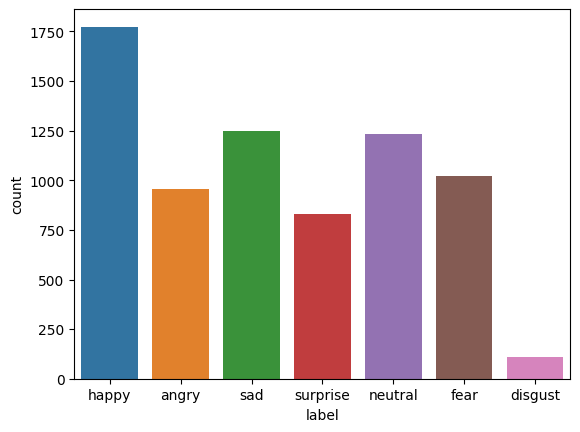

In [13]:
sns.countplot(x=train['label'])

Feature Extraction

In [16]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,grayscale=True)
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    ''' reshaping in different shape to feed in model:
    48,48 being dimension of image
    & 1= layers of color.. 1 in grayscale and 3 in rgb
    '''
    return features



In [17]:
train_features=extract_features(train['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [18]:
test_features=extract_features(test['image'])

  0%|          | 0/7178 [00:00<?, ?it/s]

In [19]:
#normalize the image
x_train=train_features/255.0
x_test=test_features/255.0
#to normalize data b/w 0 & 1 for better calculation in NN

In [22]:
#convert label to integer
#label encoding is used

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(train['label'])
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [23]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

Configuration

In [24]:
input_shape=(48,48,1)
output_class=7

Model Creation

In [43]:
model=Sequential()
#convolutional layer
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Dropout(0.3))

model.add(Conv2D(256,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(512,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(Dropout(0.3))

model.add(Conv2D(512,kernel_size=(3,3),activation="relu",input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Flatten())

#fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))

#output layer
model.add(Dense(output_class,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

Training Model

In [44]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_accuracy',  # Monitor validation accuracy
                               patience=3,             # Number of epochs with no improvement after which training will be stopped
                               restore_best_weights=True)  # Restore model weights from the epoch with the best value of the monitored quantity

history=model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
57/57 [==============================] - 17s 247ms/step - loss: 1.8915 - accuracy: 0.2240 - val_loss: 1.8173 - val_accuracy: 0.2471
Epoch 2/100
57/57 [==============================] - 16s 281ms/step - loss: 1.8239 - accuracy: 0.2407 - val_loss: 1.8141 - val_accuracy: 0.2471
Epoch 3/100
57/57 [==============================] - 16s 282ms/step - loss: 1.8163 - accuracy: 0.2464 - val_loss: 1.7970 - val_accuracy: 0.2497
Epoch 4/100
57/57 [==============================] - 16s 282ms/step - loss: 1.7983 - accuracy: 0.2590 - val_loss: 1.7326 - val_accuracy: 0.2940
Epoch 5/100
57/57 [==============================] - 16s 284ms/step - loss: 1.7222 - accuracy: 0.3075 - val_loss: 1.6559 - val_accuracy: 0.3256
Epoch 6/100
57/57 [==============================] - 16s 285ms/step - loss: 1.6570 - accuracy: 0.3466 - val_loss: 1.5545 - val_accuracy: 0.4016
Epoch 7/100
57/57 [==============================] - 16s 285ms/step - loss: 1.5890 - accuracy: 0.3858 - val_loss: 1.4845 - val_accuracy:

Plot Results

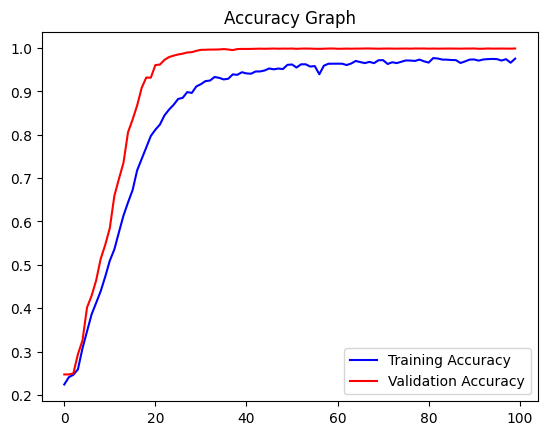

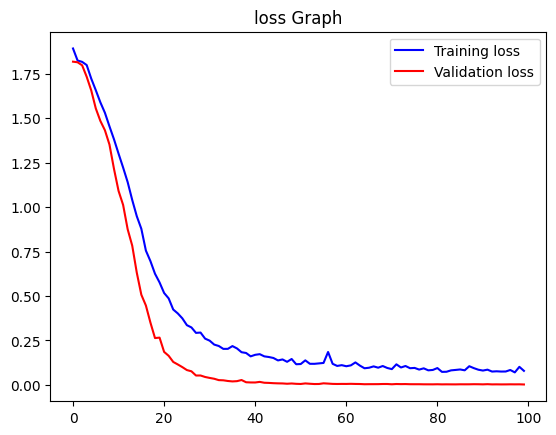

In [45]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(len(acc))

#accuracy Graph
plt.plot(epochs,acc,'b',label='Training Accuracy')
plt.plot(epochs,val_acc,'r',label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

#loss Graph
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))

plt.plot(epochs,loss,'b',label='Training loss')
plt.plot(epochs,val_loss,'r',label='Validation loss')
plt.title('loss Graph')
plt.legend()

plt.show()

Test with Image Data

Original Output: sad
1/1 [==============================] - 0s 474ms/step
Predicted Output: sad


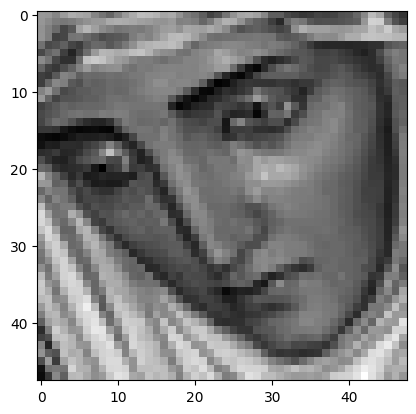

In [46]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index])
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
#pre.argmax returns the class with higher probability
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')

Original Output: angry
1/1 [==============================] - 0s 17ms/step
Predicted Output: angry


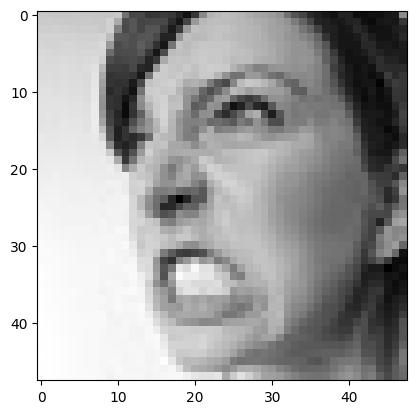

In [47]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index])
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')

Original Output: happy
1/1 [==============================] - 0s 110ms/step
Predicted Output: happy


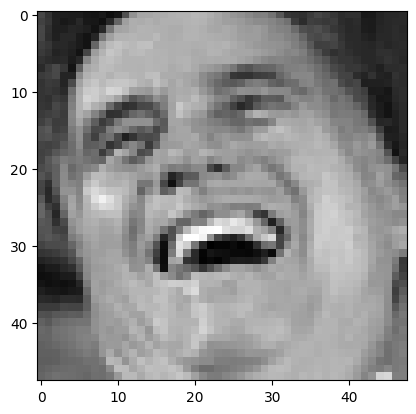

In [49]:
image_index= random.randint(0,len(test))
print("Original Output:",test['label'][image_index])
pred=model.predict(x_test[image_index].reshape(1,48,48,1))
prediction_label=le.inverse_transform([pred.argmax()])[0]
print("Predicted Output:",prediction_label)
plt.imshow(x_test[image_index].reshape(48,48),cmap='gray')